In [38]:
import keras
from keras.datasets import mnist
from keras.models import Model,Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D,BatchNormalization
from keras import backend as K
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [39]:
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

In [40]:
batch_size = 128
num_classes = 10
epochs = 20

# input image dimensions
img_rows, img_cols = 28, 28

# split data into train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [41]:
#Write your own model structure
#Hint: Use Sequential(), Dense(), DropOut(),BatchNormalization(), Conv2D(), MaxPooling2D(), model.add   ..... 
#Reduce or add layers to see if you can get better results

model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape = (28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 11, 11, 64)        256       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 32)         

In [42]:
with tf.device("cpu:0"):
    
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 102s 2ms/step - loss: 0.3901 - accuracy: 0.8798 - val_loss: 0.3525 - val_accuracy: 0.9023
Epoch 2/12
60000/60000 [==============================] - 103s 2ms/step - loss: 0.1379 - accuracy: 0.9607 - val_loss: 0.0759 - val_accuracy: 0.9788
Epoch 3/12
60000/60000 [==============================] - 103s 2ms/step - loss: 0.1037 - accuracy: 0.9705 - val_loss: 0.0715 - val_accuracy: 0.9799
Epoch 4/12
60000/60000 [==============================] - 102s 2ms/step - loss: 0.0857 - accuracy: 0.9758 - val_loss: 0.0643 - val_accuracy: 0.9831
Epoch 5/12
60000/60000 [==============================] - 104s 2ms/step - loss: 0.0764 - accuracy: 0.9782 - val_loss: 0.0579 - val_accuracy: 0.9838
Epoch 6/12
60000/60000 [==============================] - 102s 2ms/step - loss: 0.0647 - accuracy: 0.9816 - val_loss: 0.0519 - val_accuracy: 0.9840
Epoch 7/12
60000/60000 [==============================] - 103s

In [43]:
#Evaluate Model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.05414166626606739
Test accuracy: 0.9876000285148621


3	0	7	4	9	

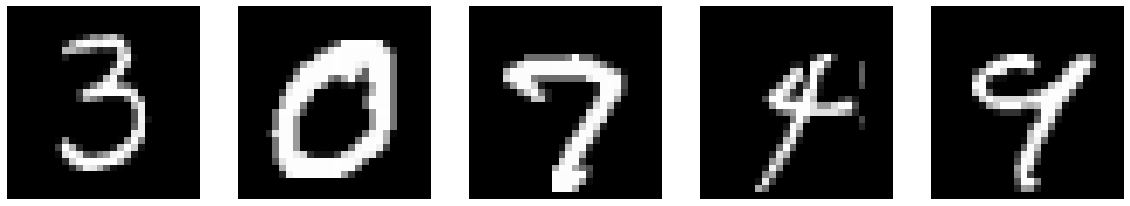

In [44]:
#Sample figure and prediction visualization
figure = plt.figure(figsize=(20,20))
for i in range(5):
    figure.add_subplot(1,5,i+1)
    plt.imshow(x_train[i+50,:,:,0],cmap="gray")
    plt.axis("off")
    print(np.squeeze(np.argmax(model.predict(x_train[i+50].reshape(1,28,28,1)),axis=1),axis=0),end="\t")

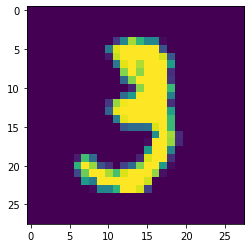

In [45]:
#Visualize 
layer_outputs = [layer.output for layer in model.layers[1:5]]
activation_model = Model(inputs=model.input,outputs=layer_outputs)
img = x_train[10].reshape(1,28,28,1)
plt.imshow(x_train[10])
#Calculate activation of the model at each layer by feed the sample figure
activations = activation_model.predict(img)


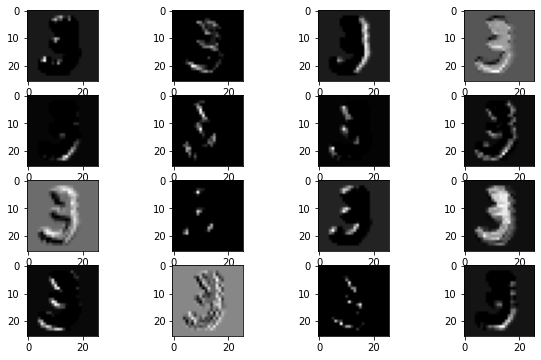

In [46]:
#Display activation at each layer of the trained model, by feeding the input image
display_activation(activations, 4, 4, 0)

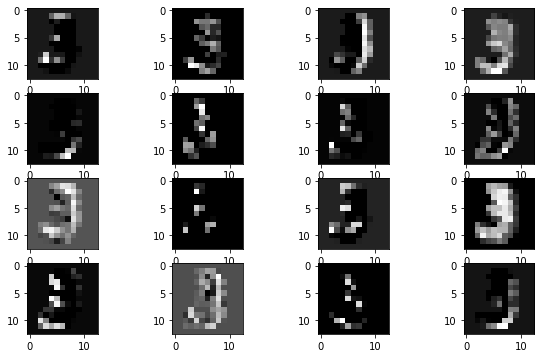

In [47]:
display_activation(activations, 4, 4, 1)

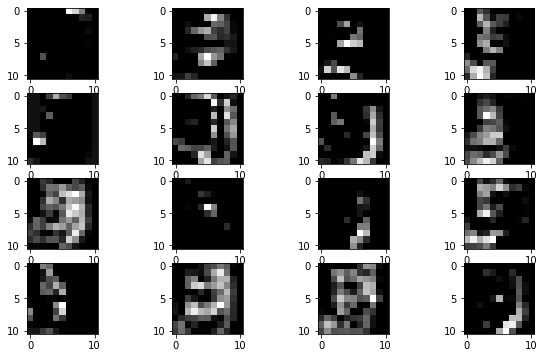

In [48]:
display_activation(activations, 4, 4, 2)

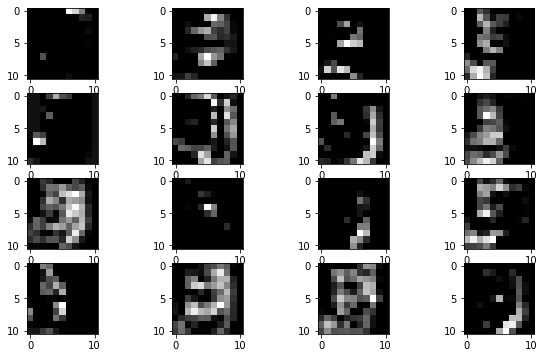

In [51]:
display_activation(activations, 4, 4, 3)